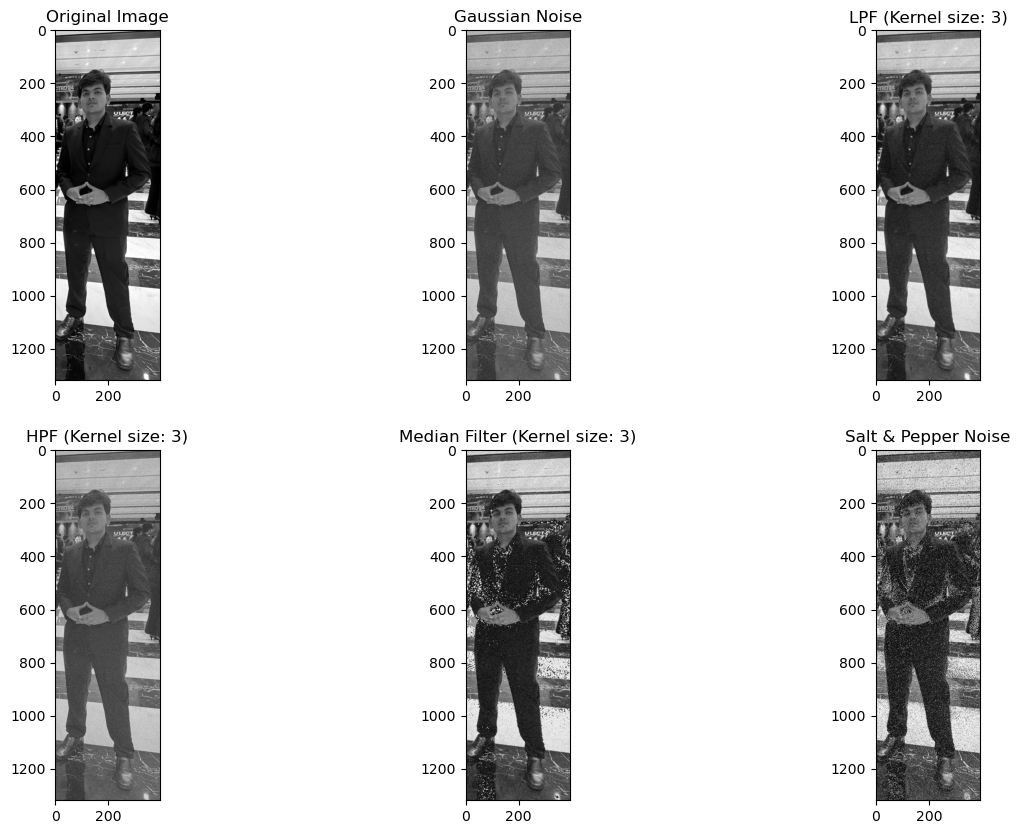

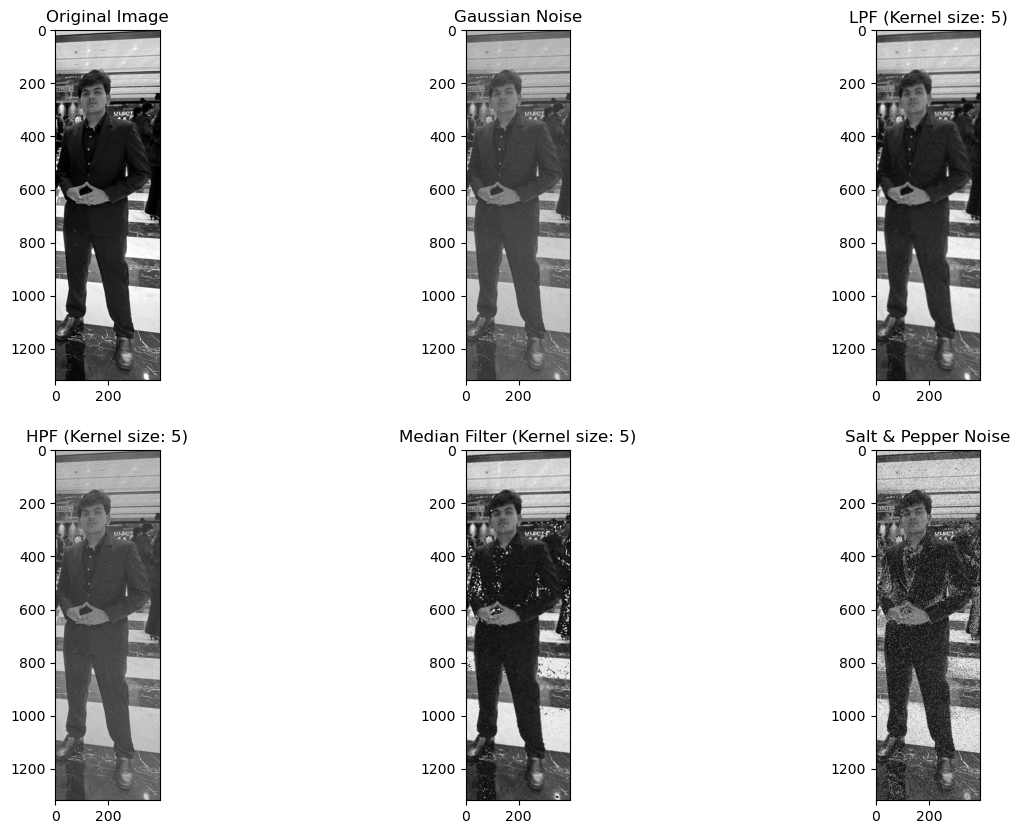

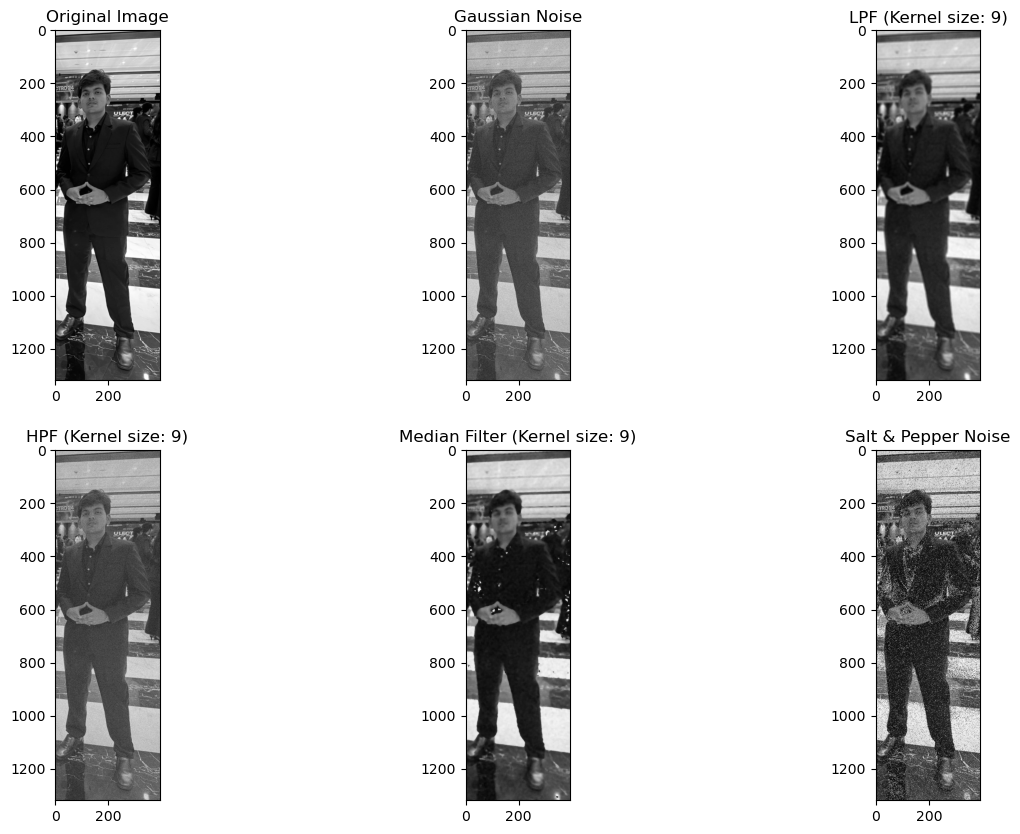

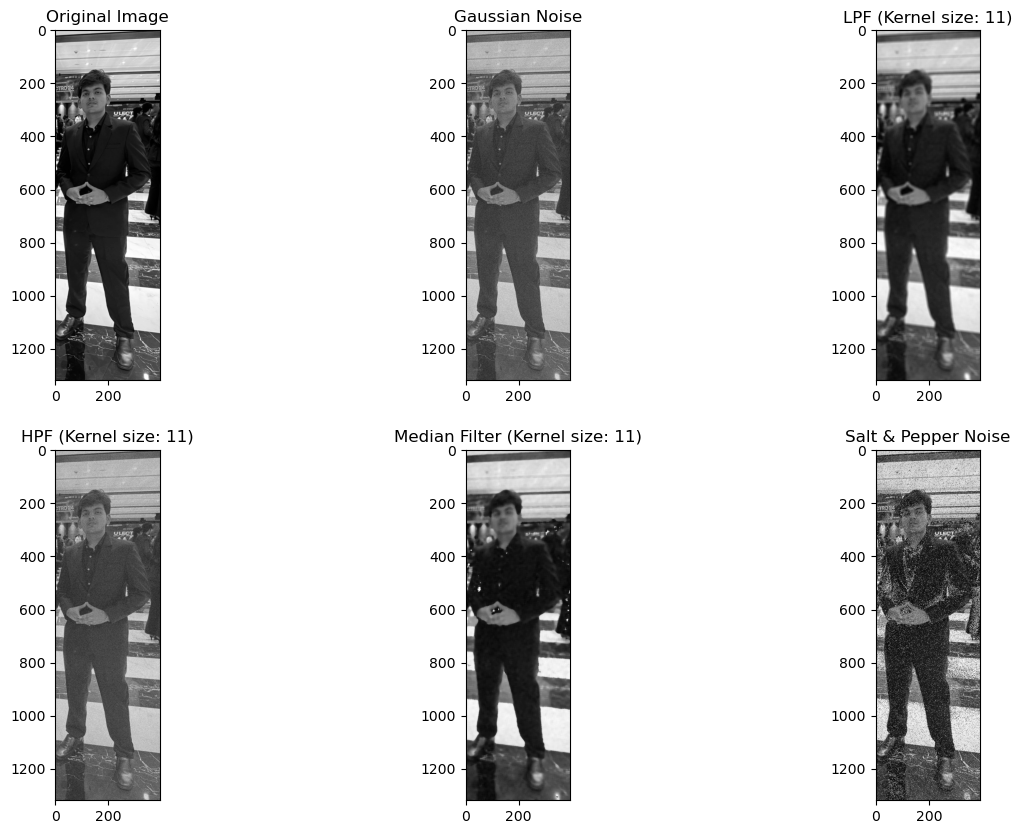

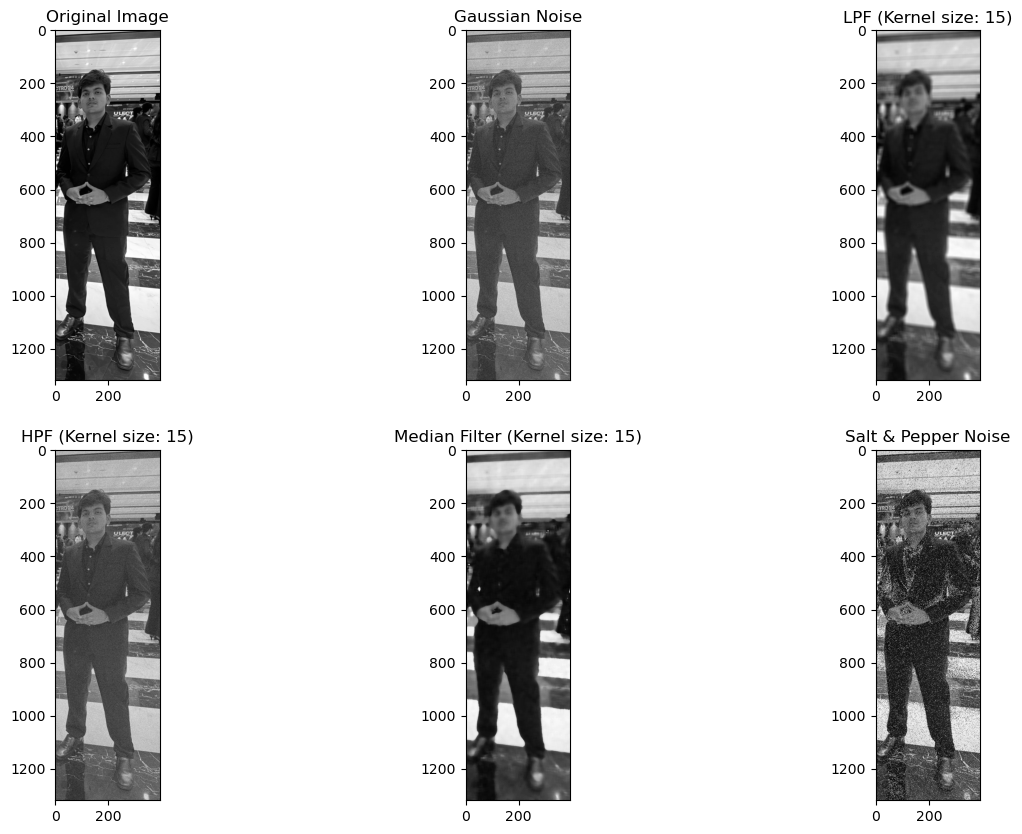

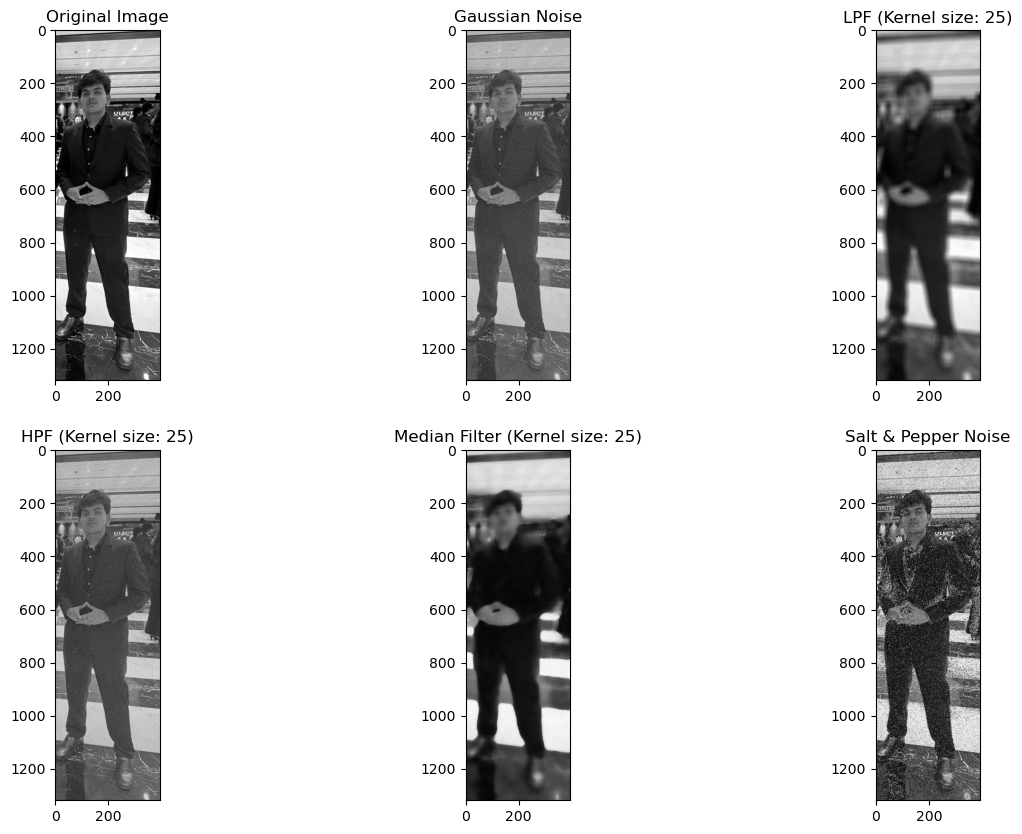

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
img = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)
 
noise_img_gaussian = img + np.random.normal(0, 20, img.shape)
 
# Add Salt & Pepper noise to the input image with varying intensity
noise_img_salt_pepper = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if np.random.rand() < 0.05:
            noise_img_salt_pepper[i, j] = 255
        elif np.random.rand() < 0.05:
            noise_img_salt_pepper[i, j] = 0
        else:
            noise_img_salt_pepper[i, j] += np.random.normal(0, 10)
 
# Add Speckle noise to the input image
noise_img_speckle = img + img * np.random.normal(0, 0.05, img.shape)
 
# Design and apply LPF, HPF, and Median filters
kernel_sizes = [3, 5, 9, 11, 15, 25]
 
for kernel_size in kernel_sizes:
    # LPF (Averaging filter)
    kernel_lpf = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    img_lpf = cv2.filter2D(noise_img_gaussian, -1, kernel_lpf)
 
    # HPF (Laplacian of Gaussian filter)
    kernel_hpf = cv2.getGaussianKernel(kernel_size, 0)
    kernel_hpf = -kernel_hpf @ kernel_hpf.T
    kernel_hpf[kernel_size//2, kernel_size//2] += kernel_size ** 2
    img_hpf = cv2.filter2D(noise_img_gaussian, -1, kernel_hpf)
 
    # Median filter
    img_median = cv2.medianBlur(noise_img_gaussian.astype(np.uint8), kernel_size)
 
    # Display the original and filtered images
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(2, 3, 2), plt.imshow(noise_img_gaussian, cmap='gray'), plt.title('Gaussian Noise')
    plt.subplot(2, 3, 3), plt.imshow(img_lpf, cmap='gray'), plt.title(f'LPF (Kernel size: {kernel_size})')
    plt.subplot(2, 3, 4), plt.imshow(img_hpf, cmap='gray'), plt.title(f'HPF (Kernel size: {kernel_size})')
    plt.subplot(2, 3, 5), plt.imshow(img_median, cmap='gray'), plt.title(f'Median Filter (Kernel size: {kernel_size})')
    plt.subplot(2, 3, 6), plt.imshow(noise_img_salt_pepper, cmap='gray'), plt.title('Salt & Pepper Noise')
    plt.show()

In [3]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('pic.jpg')
import numpy as np

gaussian_noise = np.random.normal(0, 25, image.shape)
noisy_image_gaussian = image + gaussian_noise

def add_salt_pepper_noise(image, salt_vs_pepper=0.5, amount=0.004):
    row,col,ch = image.shape
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    num_pepper = np.ceil(amount* image.size * (1.0 - salt_vs_pepper))
    
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1]] = 255
    
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[coords[0], coords[1]] = 0
    
    return image

noisy_image_sp = add_salt_pepper_noise(image.copy())
cv2_imshow(image) 
cv2_imshow(noisy_image_gaussian)  
cv2_imshow(noisy_image_sp)

image = noisy_image_gaussian

def create_hpf(size):
    hpf = np.ones((size, size)) * -1
    center = size // 2
    hpf[center, center] = size * size - 1
    return hpf

def create_lpf(size):
    return np.ones((size, size)) / (size * size)
kernel_sizes = [3, 5, 9, 11, 15, 25]

def median_filter(image, kernel_size):
    result = np.zeros_like(image)
    pad = kernel_size // 2
    
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')  
    
    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            neighborhood = padded_image[i - pad: i + pad + 1, j - pad: j + pad + 1]
            result[i - pad, j - pad] = np.median(neighborhood, axis=(0, 1))

    return result


for size in kernel_sizes:
    # Create filters
    hpf = create_hpf(size)
    lpf = create_lpf(size)

    # Apply filters
    lpf_image = cv2.filter2D(image, -1, lpf)
    hpf_image = cv2.filter2D(image, -1, hpf)
    median_image = median_filter(image.copy(), size)

cv2_imshow(lpf_image)  
cv2_imshow(hpf_image)
cv2_imshow(median_image)  


ModuleNotFoundError: No module named 'google.colab'

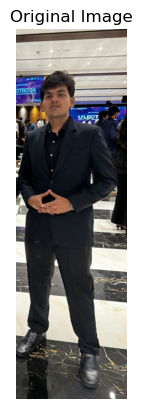

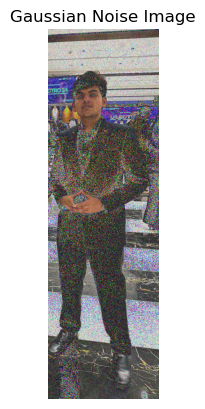

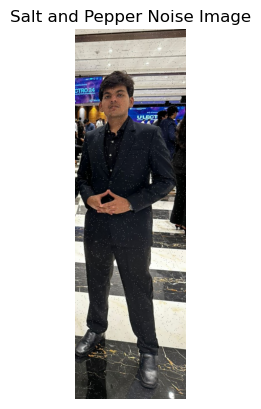

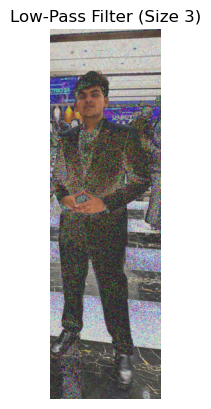

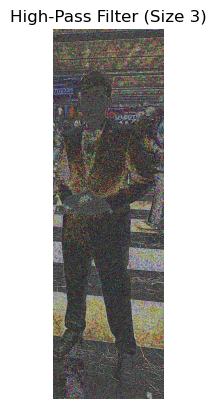

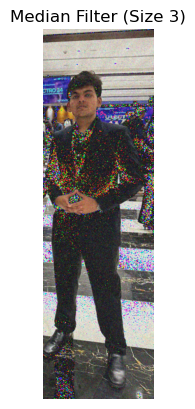

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('pic.jpg')

# Add Gaussian noise
gaussian_noise = np.random.normal(0, 25, image.shape)
noisy_image_gaussian = image + gaussian_noise

# Add salt and pepper noise
def add_salt_pepper_noise(image, salt_vs_pepper=0.5, amount=0.004):
    row, col, ch = image.shape
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))
    
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1]] = 255
    
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[coords[0], coords[1]] = 0
    
    return image

noisy_image_sp = add_salt_pepper_noise(image.copy())

# Display images
def display_image(img, title='Image'):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(image, 'Original Image')
display_image(noisy_image_gaussian.astype(np.uint8), 'Gaussian Noise Image')
display_image(noisy_image_sp, 'Salt and Pepper Noise Image')

# Switch to noisy image for filtering



In [ ]:
image = noisy_image_gaussian.astype(np.uint8)

# Create High-Pass Filter
def create_hpf(size):
    hpf = np.ones((size, size)) * -1
    center = size // 2
    hpf[center, center] = size * size - 1
    return hpf

# Create Low-Pass Filter
def create_lpf(size):
    return np.ones((size, size)) / (size * size)

# Median filter
def median_filter(image, kernel_size):
    result = np.zeros_like(image)
    pad = kernel_size // 2
    
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')  
    
    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            neighborhood = padded_image[i - pad: i + pad + 1, j - pad: j + pad + 1]
            result[i - pad, j - pad] = np.median(neighborhood, axis=(0, 1))

    return result

# Filter sizes
kernel_sizes = [3, 5, 9, 11, 15, 25]

# Apply filters and display results
for size in kernel_sizes:
    # Create filters
    hpf = create_hpf(size)
    lpf = create_lpf(size)

    # Apply filters
    lpf_image = cv2.filter2D(image, -1, lpf)
    hpf_image = cv2.filter2D(image, -1, hpf)
    median_image = median_filter(image.copy(), size)

    # Display filtered images
    display_image(lpf_image, f'Low-Pass Filter (Size {size})')
    display_image(hpf_image, f'High-Pass Filter (Size {size})')
    display_image(median_image, f'Median Filter (Size {size})')

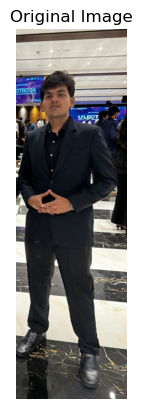

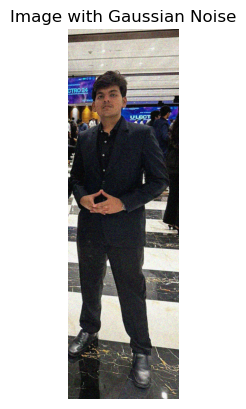

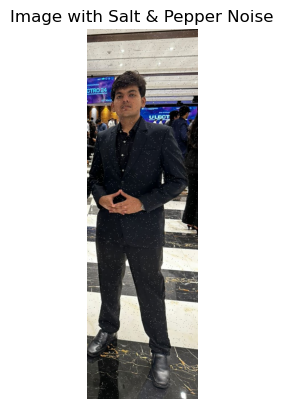

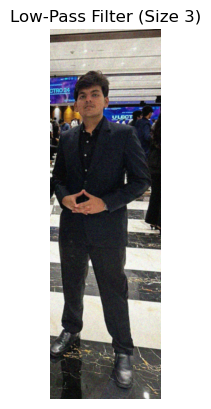

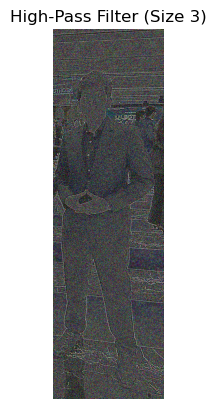

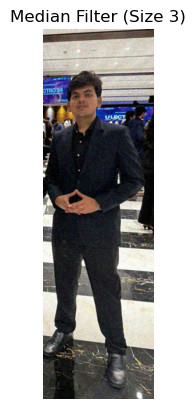

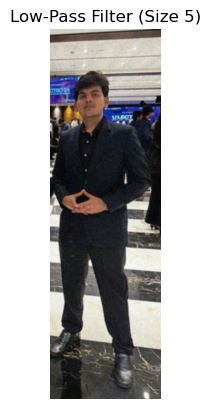

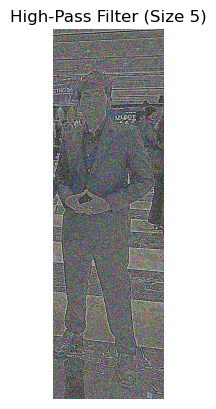

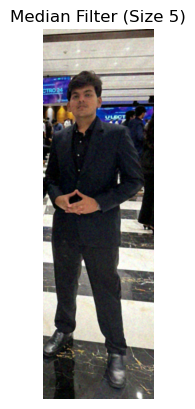

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(img, title='Image'):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image = cv2.imread('pic.jpg')
display_image(image, 'Original Image')

# 2. Add Gaussian and Salt & Pepper noise

# Gaussian noise
gaussian_noise = np.random.normal(0, 25, image.shape)
noisy_image_gaussian = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
display_image(noisy_image_gaussian, 'Image with Gaussian Noise')

# Salt & Pepper noise
def add_salt_pepper_noise(image, salt_vs_pepper=0.5, amount=0.004):
    row, col, ch = image.shape
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))
    
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1]] = 255
    
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[coords[0], coords[1]] = 0
    
    return image

noisy_image_sp = add_salt_pepper_noise(image.copy())
display_image(noisy_image_sp, 'Image with Salt & Pepper Noise')

# 3. Design HPF, LPF, and Median filters

# Create High-Pass Filter (HPF)
def create_hpf(size):
    hpf = np.ones((size, size)) * -1
    center = size // 2
    hpf[center, center] = size * size - 1
    return hpf

# Create Low-Pass Filter (LPF)
def create_lpf(size):
    return np.ones((size, size)) / (size * size)

# Median Filter implementation
def median_filter(image, kernel_size):
    result = np.zeros_like(image)
    pad = kernel_size // 2
    
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')  
    
    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            neighborhood = padded_image[i - pad: i + pad + 1, j - pad: j + pad + 1]
            result[i - pad, j - pad] = np.median(neighborhood, axis=(0, 1))

    return result

# 4. Apply LPF, HPF, and Median Filter to the noisy image (Gaussian noise for this example)
kernel_sizes = [3, 5, 9, 11, 15, 25]

for size in kernel_sizes:
    # Create filters
    hpf = create_hpf(size)
    lpf = create_lpf(size)

    # Apply filters
    lpf_image = cv2.filter2D(noisy_image_gaussian, -1, lpf)
    hpf_image = cv2.filter2D(noisy_image_gaussian, -1, hpf)
    median_image = median_filter(noisy_image_gaussian, size)

    # Display the results
    display_image(lpf_image, f'Low-Pass Filter (Size {size})')
    display_image(hpf_image, f'High-Pass Filter (Size {size})')
    display_image(median_image, f'Median Filter (Size {size})')


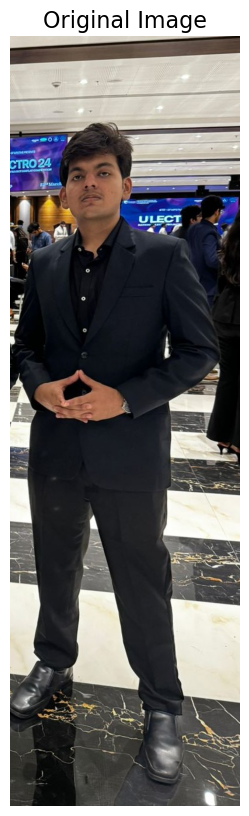

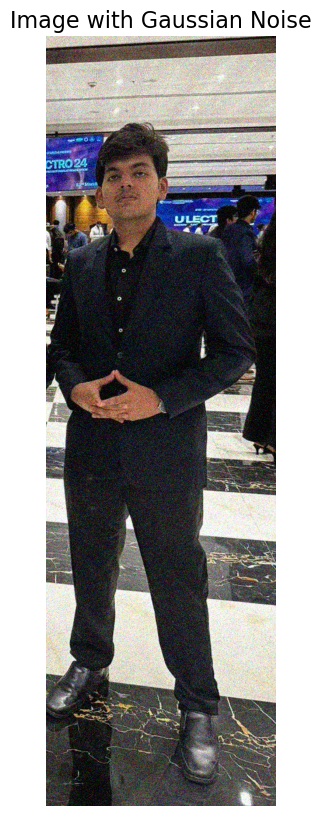

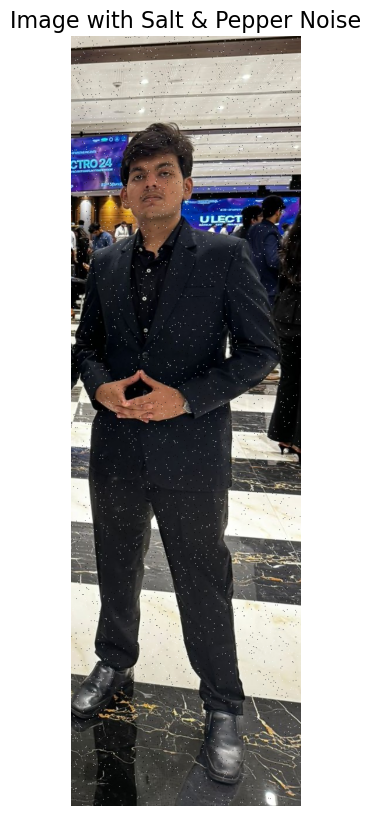

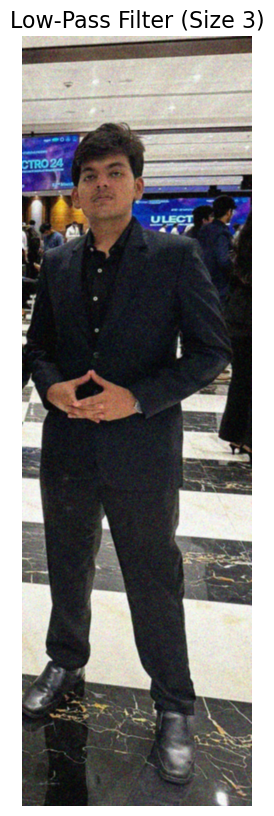

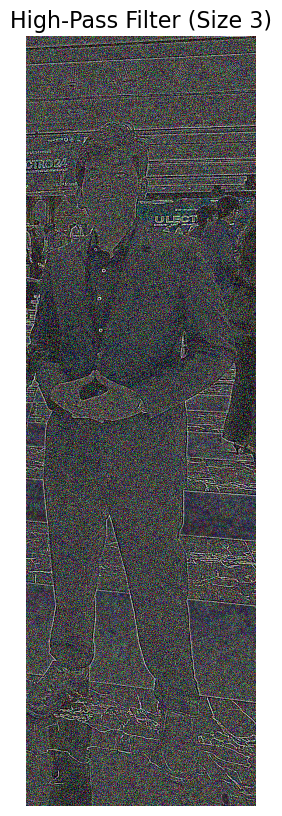

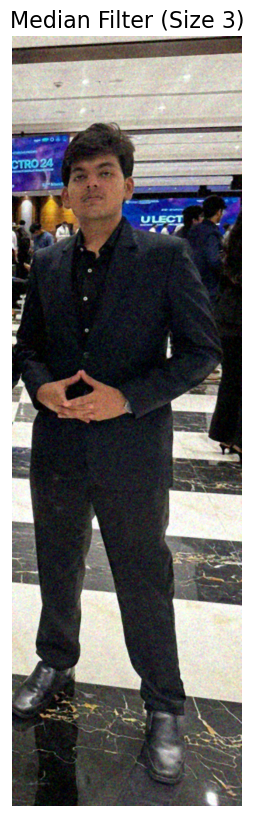

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images with increased size
def display_image(img, title='Image'):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))  # Increase the figure size
    plt.imshow(img_rgb)
    plt.title(title, fontsize=16)  # Increase title font size
    plt.axis('off')
    plt.show()

# Load the image
image = cv2.imread('pic.jpg')
display_image(image, 'Original Image')

# 2. Add Gaussian and Salt & Pepper noise

# Gaussian noise
gaussian_noise = np.random.normal(0, 25, image.shape)
noisy_image_gaussian = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
display_image(noisy_image_gaussian, 'Image with Gaussian Noise')

# Salt & Pepper noise
def add_salt_pepper_noise(image, salt_vs_pepper=0.5, amount=0.004):
    row, col, ch = image.shape
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))
    
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1]] = 255
    
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[coords[0], coords[1]] = 0
    
    return image

noisy_image_sp = add_salt_pepper_noise(image.copy())
display_image(noisy_image_sp, 'Image with Salt & Pepper Noise')

# 3. Design HPF, LPF, and Median filters

# Create High-Pass Filter (HPF)
def create_hpf(size):
    hpf = np.ones((size, size)) * -1
    center = size // 2
    hpf[center, center] = size * size - 1
    return hpf

# Create Low-Pass Filter (LPF)
def create_lpf(size):
    return np.ones((size, size)) / (size * size)

# Median Filter implementation
def median_filter(image, kernel_size):
    result = np.zeros_like(image)
    pad = kernel_size // 2
    
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')  
    
    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            neighborhood = padded_image[i - pad: i + pad + 1, j - pad: j + pad + 1]
            result[i - pad, j - pad] = np.median(neighborhood, axis=(0, 1))

    return result

# 4. Apply LPF, HPF, and Median Filter to the noisy image (Gaussian noise for this example)
kernel_sizes = [3, 5, 9, 11, 15, 25]

for size in kernel_sizes:
    # Create filters
    hpf = create_hpf(size)
    lpf = create_lpf(size)

    # Apply filters
    lpf_image = cv2.filter2D(noisy_image_gaussian, -1, lpf)
    hpf_image = cv2.filter2D(noisy_image_gaussian, -1, hpf)
    median_image = median_filter(noisy_image_gaussian, size)

    # Display the results
    display_image(lpf_image, f'Low-Pass Filter (Size {size})')
    display_image(hpf_image, f'High-Pass Filter (Size {size})')
    display_image(median_image, f'Median Filter (Size {size})')
